In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [29]:
# Download 15-minute interval data for PAWN
panw_ticker = "PANW"
panw_data = yf.download(tickers=panw_ticker, start="2024-06-18", end="2024-08-10", interval="15m")

# Display the first few rows of the data
panw_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-18 09:30:00,320.010010,321.140015,318.199402,319.230011,319.230011,169813
2024-06-18 09:45:00,319.411896,319.411896,316.579987,318.109985,318.109985,108541
2024-06-18 10:00:00,317.864990,319.500000,317.549988,317.684998,317.684998,57121
2024-06-18 10:15:00,317.679993,317.679993,316.250000,316.600006,316.600006,115517
2024-06-18 10:30:00,316.595001,317.312500,316.090088,316.954987,316.954987,73729


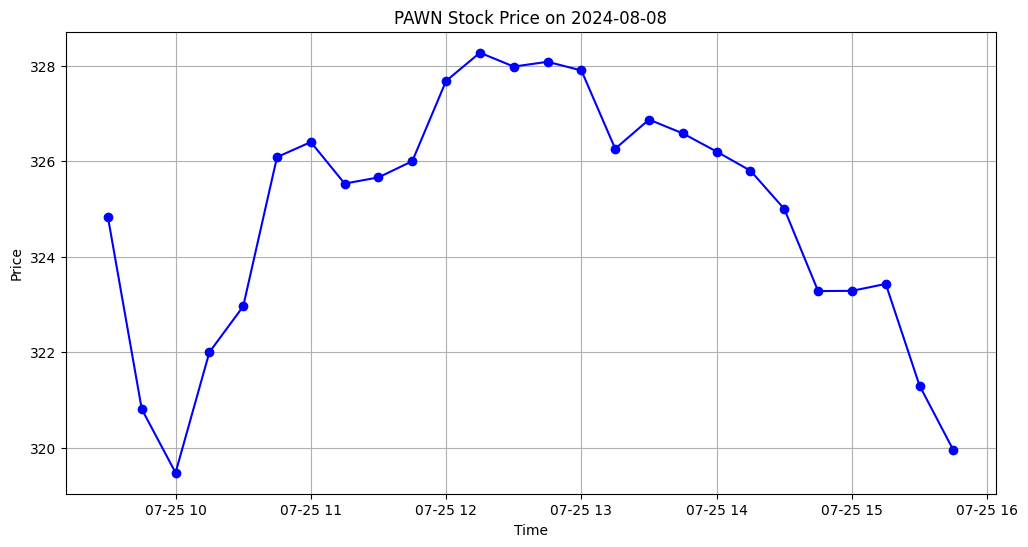

In [32]:
# Plot the stock graph for a specific day
single_day_data = panw_data.loc['2024-07-25']  # Replace with the desired date
single_day_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(single_day_data['Datetime'], single_day_data['Close'], marker='o', linestyle='-', color='blue')
plt.title("PAWN Stock Price on 2024-08-08")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [33]:
panw_data['Date'] = panw_data.index.date

In [38]:
data = panw_data

In [41]:
interval_counts = data.groupby('Date').size()
complete_days = interval_counts[interval_counts == interval_counts.max()].index

# Filter out incomplete days
data = data[data['Date'].isin(complete_days)]

In [43]:
# Reshape each day's data into a single row vector
daily_vectors = data.groupby('Date').apply(lambda x: x['Close'].values)

# Convert the result into a DataFrame where each row is a day's feature vector
daily_vectors_df = pd.DataFrame(daily_vectors.tolist(), index=complete_days)

# Optionally, name the columns for clarity (e.g., t1, t2, ..., tN)
daily_vectors_df.columns = [f't{i+1}' for i in range(daily_vectors_df.shape[1])]

print(daily_vectors_df.head())


                    t1          t2          t3          t4          t5  \
Date                                                                     
2024-06-20  313.709991  313.078003  311.315002  310.910004  311.665009   
2024-06-21  314.269989  314.350006  314.035492  315.579987  317.299988   
2024-06-24  323.720001  322.559998  325.380188  324.089905  323.622314   
2024-06-25  318.377106  316.899994  319.670013  320.684998  321.690002   
2024-06-26  321.779999  320.869995  320.864990  322.070007  323.348511   

                    t6          t7          t8          t9         t10  ...  \
Date                                                                    ...   
2024-06-20  314.279999  314.152008  314.000000  314.200012  313.260010  ...   
2024-06-21  318.600006  319.600006  318.739990  317.799988  319.049988  ...   
2024-06-24  322.069885  321.549896  320.179993  318.244995  319.190002  ...   
2024-06-25  322.130005  323.980011  325.089996  325.350006  325.970093  ...   
2024-06

/var/folders/gr/gh8bm86131s7lgz6qymym3w40000gp/T/ipykernel_5519/2026699853.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_vectors = data.groupby('Date').apply(lambda x: x['Close'].values)


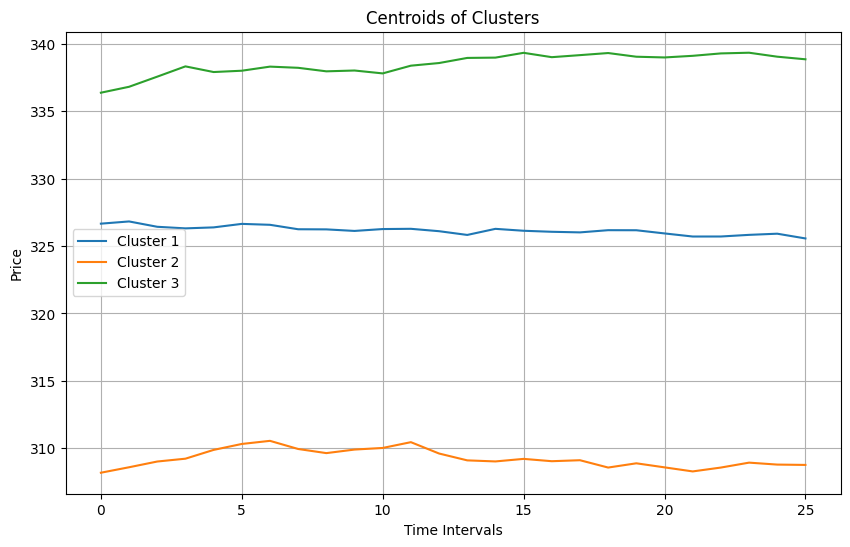

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming `daily_vectors_df` is your DataFrame with each row as a day's feature vector (intraday price movements)

# Standardize the data before clustering
scaler = StandardScaler()
daily_vectors_scaled = scaler.fit_transform(daily_vectors_df.drop(columns=['Cluster'], errors='ignore'))

# Apply KMeans clustering (assuming 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(daily_vectors_scaled)

# Add the cluster labels to the DataFrame
daily_vectors_df['Cluster'] = clusters

# Calculate the centroids (means of the clusters)
centroids = kmeans.cluster_centers_

# Inverse the scaling to bring centroids back to the original scale
centroids_original_scale = scaler.inverse_transform(centroids)

# Plot the centroids
plt.figure(figsize=(10, 6))

for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i+1}')

plt.title('Centroids of Clusters')
plt.xlabel('Time Intervals')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Normalize each day's data to have a mean of 0 and standard deviation of 1
def normalize_day(day_data):
    return (day_data - day_data.mean()) / day_data.std()

# Apply normalization to each day's data
normalized_daily_vectors_df = daily_vectors_df.apply(normalize_day, axis=1)

# Handle potential NaNs if a day's data had zero variance
normalized_daily_vectors_df.dropna(inplace=True)

print(normalized_daily_vectors_df.head())


                  t1        t2        t3        t4        t5        t6  \
Date                                                                     
2024-06-20  0.220662  0.210106  0.180658  0.173894  0.186505  0.230183   
2024-06-21  0.136425  0.137737  0.132579  0.157911  0.186122  0.207445   
2024-06-24  0.264328  0.245468  0.291320  0.270342  0.262740  0.237500   
2024-06-25  0.123535  0.099760  0.144345  0.160682  0.176859  0.183941   
2024-06-26  0.150851  0.136278  0.136198  0.155495  0.175970  0.190567   

                  t7        t8        t9       t10  ...       t18       t19  \
Date                                                ...                       
2024-06-20  0.228045  0.225506  0.228847  0.213146  ...  0.177735  0.182529   
2024-06-21  0.223846  0.209740  0.194323  0.214825  ...  0.175133  0.177675   
2024-06-24  0.229046  0.206774  0.175314  0.190678  ...  0.167318  0.165315   
2024-06-25  0.213718  0.231584  0.235769  0.245750  ...  0.199145  0.208568   
2024-06

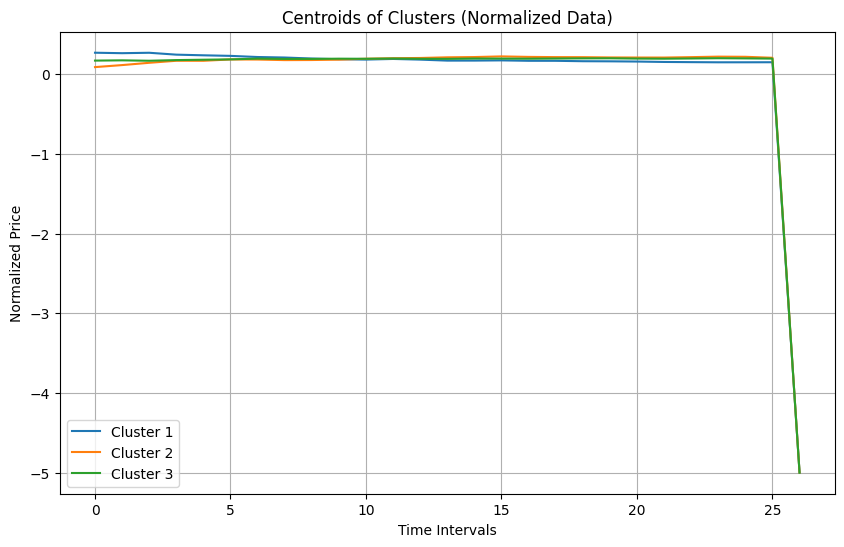

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Now perform clustering on the normalized data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_daily_vectors_df)

# Add the cluster labels to the DataFrame
normalized_daily_vectors_df['Cluster'] = clusters

# Calculate the centroids (mean vectors) of the clusters
centroids = kmeans.cluster_centers_

# Plot the centroids to visualize the typical shapes of each cluster
plt.figure(figsize=(10, 6))

for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i+1}')

plt.title('Centroids of Clusters (Normalized Data)')
plt.xlabel('Time Intervals')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
import numpy as np
from scipy.signal import detrend

# Detrend the data by subtracting a moving average
def detrend_day(day_data):
    return day_data - day_data.rolling(window=3, min_periods=1).mean()

# Apply the detrending function to each day
detrended_daily_vectors_df = daily_vectors_df.apply(detrend_day, axis=1)

# Handle potential NaNs by filling them (as a result of rolling window)
detrended_daily_vectors_df.fillna(method='bfill', inplace=True)

print(detrended_daily_vectors_df.head())


             t1        t2        t3        t4        t5        t6        t7  \
Date                                                                          
2024-06-20  0.0 -0.315994 -1.385997 -0.857666  0.368337  1.994995  0.786336   
2024-06-21  0.0  0.040009 -0.183004  0.924825  1.661499  1.440013  1.100006   
2024-06-24  0.0 -0.580002  1.493459  0.079875 -0.741821 -1.190816 -0.864136   
2024-06-25  0.0 -0.738556  1.354309  1.599996  1.008331  0.628337  1.380005   
2024-06-26  0.0 -0.455002 -0.306671  0.801676  1.254008  1.033834  0.730489   

                  t8        t9       t10  ...       t18       t19       t20  \
Date                                      ...                                 
2024-06-20 -0.144002  0.082672 -0.559998  ... -0.386658  0.007996  0.310994   
2024-06-21 -0.240011 -0.913340  0.519999  ... -0.065196  0.058004  0.508331   
2024-06-24 -1.086599 -1.746633 -0.014994  ... -0.221161 -0.157694 -0.781077   
2024-06-25  1.356659  0.543335  0.500061  ...  0.52

/var/folders/gr/gh8bm86131s7lgz6qymym3w40000gp/T/ipykernel_5519/1609752162.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  detrended_daily_vectors_df.fillna(method='bfill', inplace=True)


In [48]:
from scipy.fft import fft

# Apply Fourier Transform to each day's data
def fourier_transform(day_data):
    return np.abs(fft(day_data))[:len(day_data)//2]

# Apply Fourier transform
fourier_daily_vectors_df = detrended_daily_vectors_df.apply(fourier_transform, axis=1)

# Convert the list of arrays into a DataFrame
fourier_daily_vectors_df = pd.DataFrame(fourier_daily_vectors_df.tolist(), index=detrended_daily_vectors_df.index)

print(fourier_daily_vectors_df.head())


KeyError: 'ALIGNED'

In [49]:
import pandas as pd
import numpy as np
from scipy.fft import fft

# Assume 'detrended_daily_vectors_df' is already defined from previous steps

# Check for non-numeric columns
non_numeric_columns = detrended_daily_vectors_df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns detected: {non_numeric_columns}")
    # Drop or handle non-numeric columns as needed
    detrended_daily_vectors_df = detrended_daily_vectors_df.drop(columns=non_numeric_columns)

# Handle missing values
if detrended_daily_vectors_df.isnull().values.any():
    print("Missing values detected. Filling with forward fill method.")
    detrended_daily_vectors_df = detrended_daily_vectors_df.fillna(method='ffill').fillna(method='bfill')


In [50]:
# Define the Fourier Transform function
def fourier_transform(day_data):
    # Ensure the input is a 1D numpy array
    day_array = day_data.values
    # Apply FFT
    fft_result = fft(day_array)
    # Return the magnitudes of the positive frequency components
    return np.abs(fft_result)[:len(fft_result)//2]

# Apply the Fourier Transform to each day's data
fourier_transformed_list = []
for index, row in detrended_daily_vectors_df.iterrows():
    transformed_row = fourier_transform(row)
    fourier_transformed_list.append(transformed_row)

# Determine the number of frequency components
num_freq_components = len(fourier_transformed_list[0])

# Create a DataFrame from the list of transformed rows
fourier_columns = [f'Freq_{i+1}' for i in range(num_freq_components)]
fourier_daily_vectors_df = pd.DataFrame(fourier_transformed_list, columns=fourier_columns, index=detrended_daily_vectors_df.index)

print(fourier_daily_vectors_df.head())


                Freq_1      Freq_2      Freq_3      Freq_4      Freq_5  \
Date                                                                     
2024-06-20  209.251328  205.550387  209.593805  204.787594  201.685062   
2024-06-21  206.839996  207.387363  218.197545  214.604912  213.041512   
2024-06-24  218.014704  208.499680  205.607458  213.388175  215.573140   
2024-06-25  210.590922  212.445532  224.231517  211.784565  217.758062   
2024-06-26  213.134995  214.940166  223.273106  215.893037  216.147846   

                Freq_6      Freq_7      Freq_8      Freq_9     Freq_10  \
Date                                                                     
2024-06-20  204.357636  208.979745  208.542546  206.658838  206.754017   
2024-06-21  207.882708  216.135051  213.828722  212.597093  214.917176   
2024-06-24  211.765405  212.147709  208.239259  208.692864  210.737103   
2024-06-25  216.962479  215.751919  210.228655  212.914921  215.334595   
2024-06-26  217.526477  214.496174  2

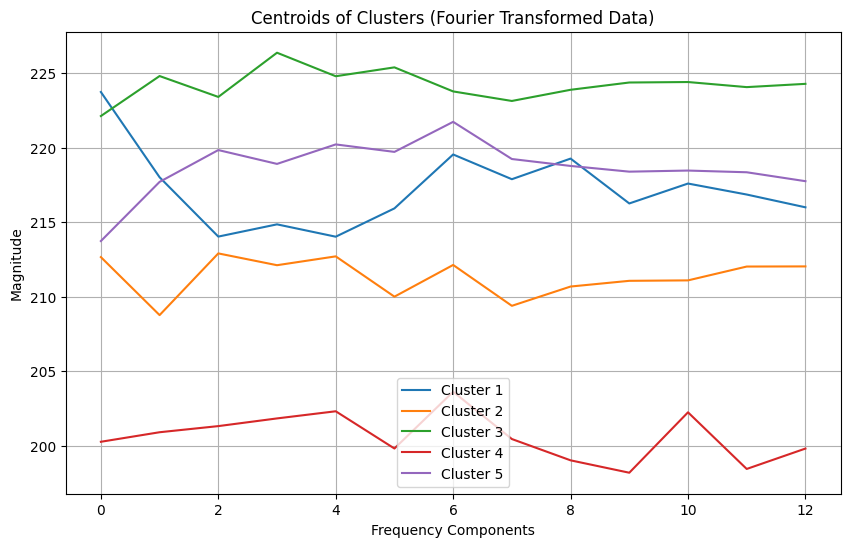

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Decide on the number of clusters
n_clusters = 5  # Adjust as needed

# Perform clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(fourier_daily_vectors_df)

# Add cluster labels to the DataFrame
fourier_daily_vectors_df['Cluster'] = clusters

# Calculate and plot the centroid of each cluster
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    centroid = centroids[i]
    plt.plot(centroid, label=f'Cluster {i+1}')

plt.title('Centroids of Clusters (Fourier Transformed Data)')
plt.xlabel('Frequency Components')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
fourier_daily_vectors_df[fourier_daily_vectors_df['Cluster'] == 1].index[0]

datetime.date(2024, 6, 20)

In [72]:
cluster1 = daily_vectors_df[fourier_daily_vectors_df['Cluster'] == 1]

In [83]:
cluster1.drop(columns=['Cluster'])

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-20,313.709991,313.078003,311.315002,310.910004,311.665009,314.279999,314.152008,314.000000,314.200012,313.260010,...,311.690002,311.140015,311.427002,311.750000,310.915009,310.250000,310.309998,310.170013,310.700012,311.059998
2024-06-21,314.269989,314.350006,314.035492,315.579987,317.299988,318.600006,319.600006,318.739990,317.799988,319.049988,...,316.765991,316.630005,316.785004,317.470001,317.894989,318.380005,318.170013,319.040009,319.959991,320.329987
2024-06-24,323.720001,322.559998,325.380188,324.089905,323.622314,322.069885,321.549896,320.179993,318.244995,319.190002,...,317.979889,317.753204,317.630005,316.519989,316.059998,315.959991,316.325012,316.570007,316.619995,316.535889
2024-06-25,318.377106,316.899994,319.670013,320.684998,321.690002,322.130005,323.980011,325.089996,325.350006,325.970093,...,322.334991,323.074585,323.660004,325.019989,323.255615,323.385010,322.890015,323.260010,322.890015,322.619995
2024-07-25,324.829895,320.809998,319.477509,322.000000,322.959991,326.084991,326.399994,325.529999,325.660004,326.000000,...,326.869995,326.581299,326.200012,325.799988,325.000000,323.279999,323.285004,323.429993,321.300598,319.950012
2024-07-30,324.714996,324.750000,325.720001,325.299988,325.040009,324.184998,321.700012,322.289490,320.390015,319.000000,...,316.770386,317.019989,317.929993,318.570007,318.570007,318.309998,318.160004,317.940002,317.549988,317.369995
2024-08-01,323.575012,323.149994,324.700012,323.390015,323.769989,322.000000,320.464996,320.214996,317.730011,317.714996,...,312.695007,314.174988,312.750000,313.040009,312.674988,313.165009,314.089996,314.320007,313.269989,315.619995
2024-08-08,308.720001,310.244995,313.470001,315.459991,315.359985,315.799988,313.609985,314.380005,314.015015,314.679993,...,315.660004,315.595001,316.299988,316.029999,315.559998,315.660004,315.850006,315.850006,316.632996,317.329987


/var/folders/gr/gh8bm86131s7lgz6qymym3w40000gp/T/ipykernel_5519/338487346.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


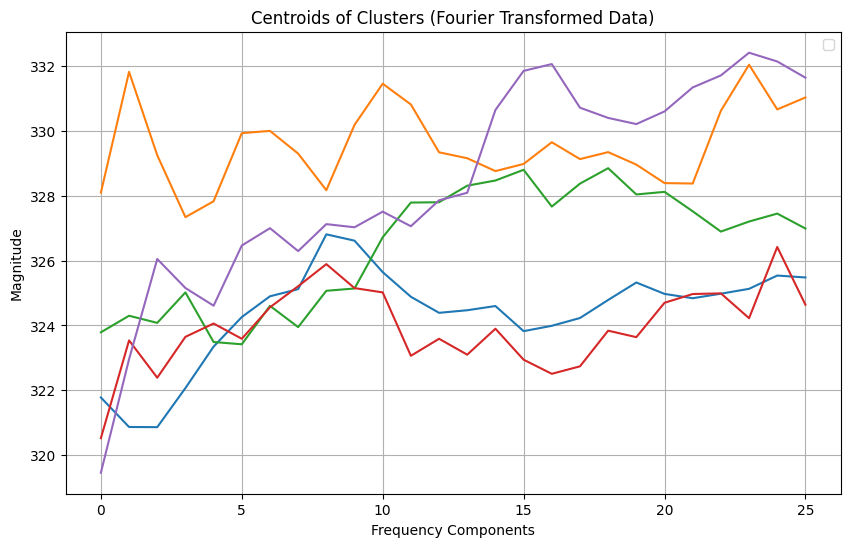

In [89]:
plt.figure(figsize=(10, 6))
for _,row in daily_vectors_df[fourier_daily_vectors_df['Cluster'] == 4].drop(columns=['Cluster']).iterrows():
    plt.plot(row.values)

plt.title('Centroids of Clusters (Fourier Transformed Data)')
plt.xlabel('Frequency Components')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()
